In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

pd.set_option('future.no_silent_downcasting', True)
pd.options.display.max_columns = 50

# Prediction of monthly rent for German apartments

The aim of this exercise is to predict the monthly rent for an apartment based on various features such as the size and condition of the flat, service charges, federal state, etc. The data will be collected in the form "immo_data.csv" and "immo_data_column_description.csv". You can download them from Moodle. Alternatively, you can download the immo_data.csv file here: https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany.

The data comes from Immoscout24, the largest real estate platform in Germany. Immoscout24 offers both rental and purchase properties, but the data only contains offers for rental properties. At a certain point in time, all available offers were retrieved from the website and stored. This process was repeated three times so that the dataset contains listings from 2018-09-22, 2019-05-10 and 2019-10-08.

The dataset contains most of the important characteristics, such as the size of the living area, the rent, both cold rent and total rent (if applicable), the location (street and house number, if available, postcode and state), energy type, etc. There are also two variables that contain longer free text descriptions: Description with text describing what is on offer, and Amenities with a description of all available facilities, recent renovation, etc. The date column was added to indicate the time of scraping.

We would like to test our knowledge of linear regression and data analysis on this dataset.

In [84]:
df_raw = pd.read_csv("Data/immo_data.csv")
display(df_raw)
desc = pd.read_csv("Data/immo_data_column_description.csv")
desc

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.00,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.90,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,910.0,2016.0,115641081,1.0,geothermal,False,Bayern,True,9.0,820.0,NaN,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,no_information,NaN,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,1150.0,1983.0,96981497,1.0,gas,True,Hessen,False,4.0,930.0,NaN,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,no_information,NaN,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,930.0,1965.0,66924271,1.0,gas,False,Hessen,True,2.0,650.0,10,95.00,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,Emsbachstrasse,Emsbachstrasse,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4,Limburg_Weilburg_Krei

,Column Name,Description
0,regio1,Bundesland
1,serviceCharge,aucilliary costs such as electricty or interne...
2,heatingType,Type of heating
3,telekomTvOffer,Is payed TV included if so which offer
4,telekomHybridUploadSpeed,how fast is the hybrid inter upload speed
5,newlyConst,is the building newly constructed
6,balcony,does the object have a balcony
7,picturecount,how many pictures were uploaded to the listing
8,pricetrend,price trend as calculated by Immoscout
9,telekomUploadSpeed,how fast is the internet upload speed


From the list of descriptions, we notice some attributes probably have no predictive power (actually, we would have to verify this in the tasks below!). We exclude these directly by calling the "drop" method of the DataFrame and passing the corresponding column names. The argument errors="ignore" says that if the column does not (no longer) exist, no error message should be produced. This is helpful here: if you execute a cell several times in the notebook, an error message would always appear after the second time since thise attributes do not exsit anymore.

In [85]:
df = df_raw.copy()
# Restricting the data set to a specific region
#df = df[df["regio2"]=="Karlsruhe"]
#df = df[df["regio1"]=="Baden_Württemberg"]

df = df.drop(["scoutId", "houseNumber", "geo_bln", "geo_krs", "geo_plz", "date"], axis="columns", errors="ignore")

## Data analysis

### Non-numeric data
We take a closer look at the columns, i.e. the *attributes*, some of which later become *features*. To keep it a little clearer, let's look at the non-numeric columns first and then the numeric columns.

In [86]:
numeric_columns = df.select_dtypes(include=np.number).columns
categorical_columns = df.select_dtypes(exclude=np.number).columns

df[categorical_columns].describe()

,regio1,heatingType,telekomTvOffer,newlyConst,balcony,firingTypes,hasKitchen,cellar,condition,interiorQual,petsAllowed,street,streetPlain,lift,typeOfFlat,garden,regio2,regio3,description,facilities,energyEfficiencyClass
count,268850,223994,236231,268850,268850,211886,268850,268850,200361,156185,154277,268850,197837,268850,232236,268850,268850,268850,249103,215926,77787
unique,16,13,3,2,2,132,2,2,10,4,3,52373,54490,2,10,2,419,8684,212621,189526,10
top,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,False,True,gas,False,True,well_kept,normal,negotiable,no_information,Hauptstraße,False,apartment,False,Leipzig,Innenstadt,+ MEIN GUENTZ - Quartier der Generationen\r\n+...,Laminat,C
freq,62863,128977,227632,247679,165734,110899,176794,172235,66591,81826,91970,71013,911,205528,131522,216093,13723,4751,216,207,14613


Top is the most frequent value, and freq is its frequency.

Reminder: When categorical features are transformed using One-Hot Encoding, a new column is created for each expression. The number of different expressions is indicated by the row "unique". If, for example, we were to transform "description" (this is a free text field) using One-Hot Encoding, we would obtain a DataFrame (i.e. a data matrix) with over 200,000 columns! We therefore exclude attributes with too many values for the time being.

In [87]:
df = df.drop(["street", "streetPlain", "description", "facilities", "regio3"], axis=1, errors="ignore")

We notice an attribute "firingTypes" (according to the description the "main energy source"), which has 132 different characteristics. Let's take a closer look.

In [88]:
df["firingTypes"].unique()

array(['oil', 'gas', nan, 'district_heating', 'gas:electricity',
       'electricity', 'pellet_heating', 'natural_gas_light',
       'combined_heat_and_power_fossil_fuels',
       'district_heating:local_heating', 'steam_district_heating',
       'natural_gas_heavy', 'gas:district_heating', 'solar_heating:gas',
       'environmental_thermal_energy', 'local_heating',
       'gas:natural_gas_light', 'geothermal',
       'combined_heat_and_power_regenerative_energy', 'heat_supply',
       'oil:electricity', 'solar_heating', 'geothermal:solar_heating',
       'district_heating:electricity', 'liquid_gas', 'wood',
       'hydro_energy', 'combined_heat_and_power_renewable_energy', 'coal',
       'gas:steam_district_heating', 'bio_energy',
       'gas:environmental_thermal_energy', 'wood_chips', 'gas:oil',
       'solar_heating:wood', 'geothermal:gas',
       'solar_heating:gas:electricity',
       'gas:natural_gas_light:heat_supply', 'pellet_heating:gas',
       'solar_heating:gas:bio_energy'

There is a similar attribute heatingType, but it has far fewer characteristics. We look at which characteristics there are.

In [89]:
df["heatingType"].unique()

array(['central_heating', 'self_contained_central_heating',
       'floor_heating', 'district_heating', 'gas_heating', 'oil_heating',
       nan, 'wood_pellet_heating', 'electric_heating',
       'combined_heat_and_power_plant', 'heat_pump',
       'night_storage_heater', 'stove_heating', 'solar_heating'],
      dtype=object)

We first decide to exclude the more detailed of the two attributes so that the resulting data set is not so large.

In [90]:
df = df.drop("firingTypes", axis=1, errors="ignore")

We look again at the categorical attributes that we want to keep as candidates for features.

In [91]:
display(df.describe(exclude=np.number))

,regio1,heatingType,telekomTvOffer,newlyConst,balcony,hasKitchen,cellar,condition,interiorQual,petsAllowed,lift,typeOfFlat,garden,regio2,energyEfficiencyClass
count,268850,223994,236231,268850,268850,268850,268850,200361,156185,154277,268850,232236,268850,268850,77787
unique,16,13,3,2,2,2,2,10,4,3,2,10,2,419,10
top,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,False,True,False,True,well_kept,normal,negotiable,False,apartment,False,Leipzig,C
freq,62863,128977,227632,247679,165734,176794,172235,66591,81826,91970,205528,131522,216093,13723,14613


Next, we look at the frequency distribution of the different expressions. Here we work with the method .value_counts() of Pandas and create each plot separately in a grid.

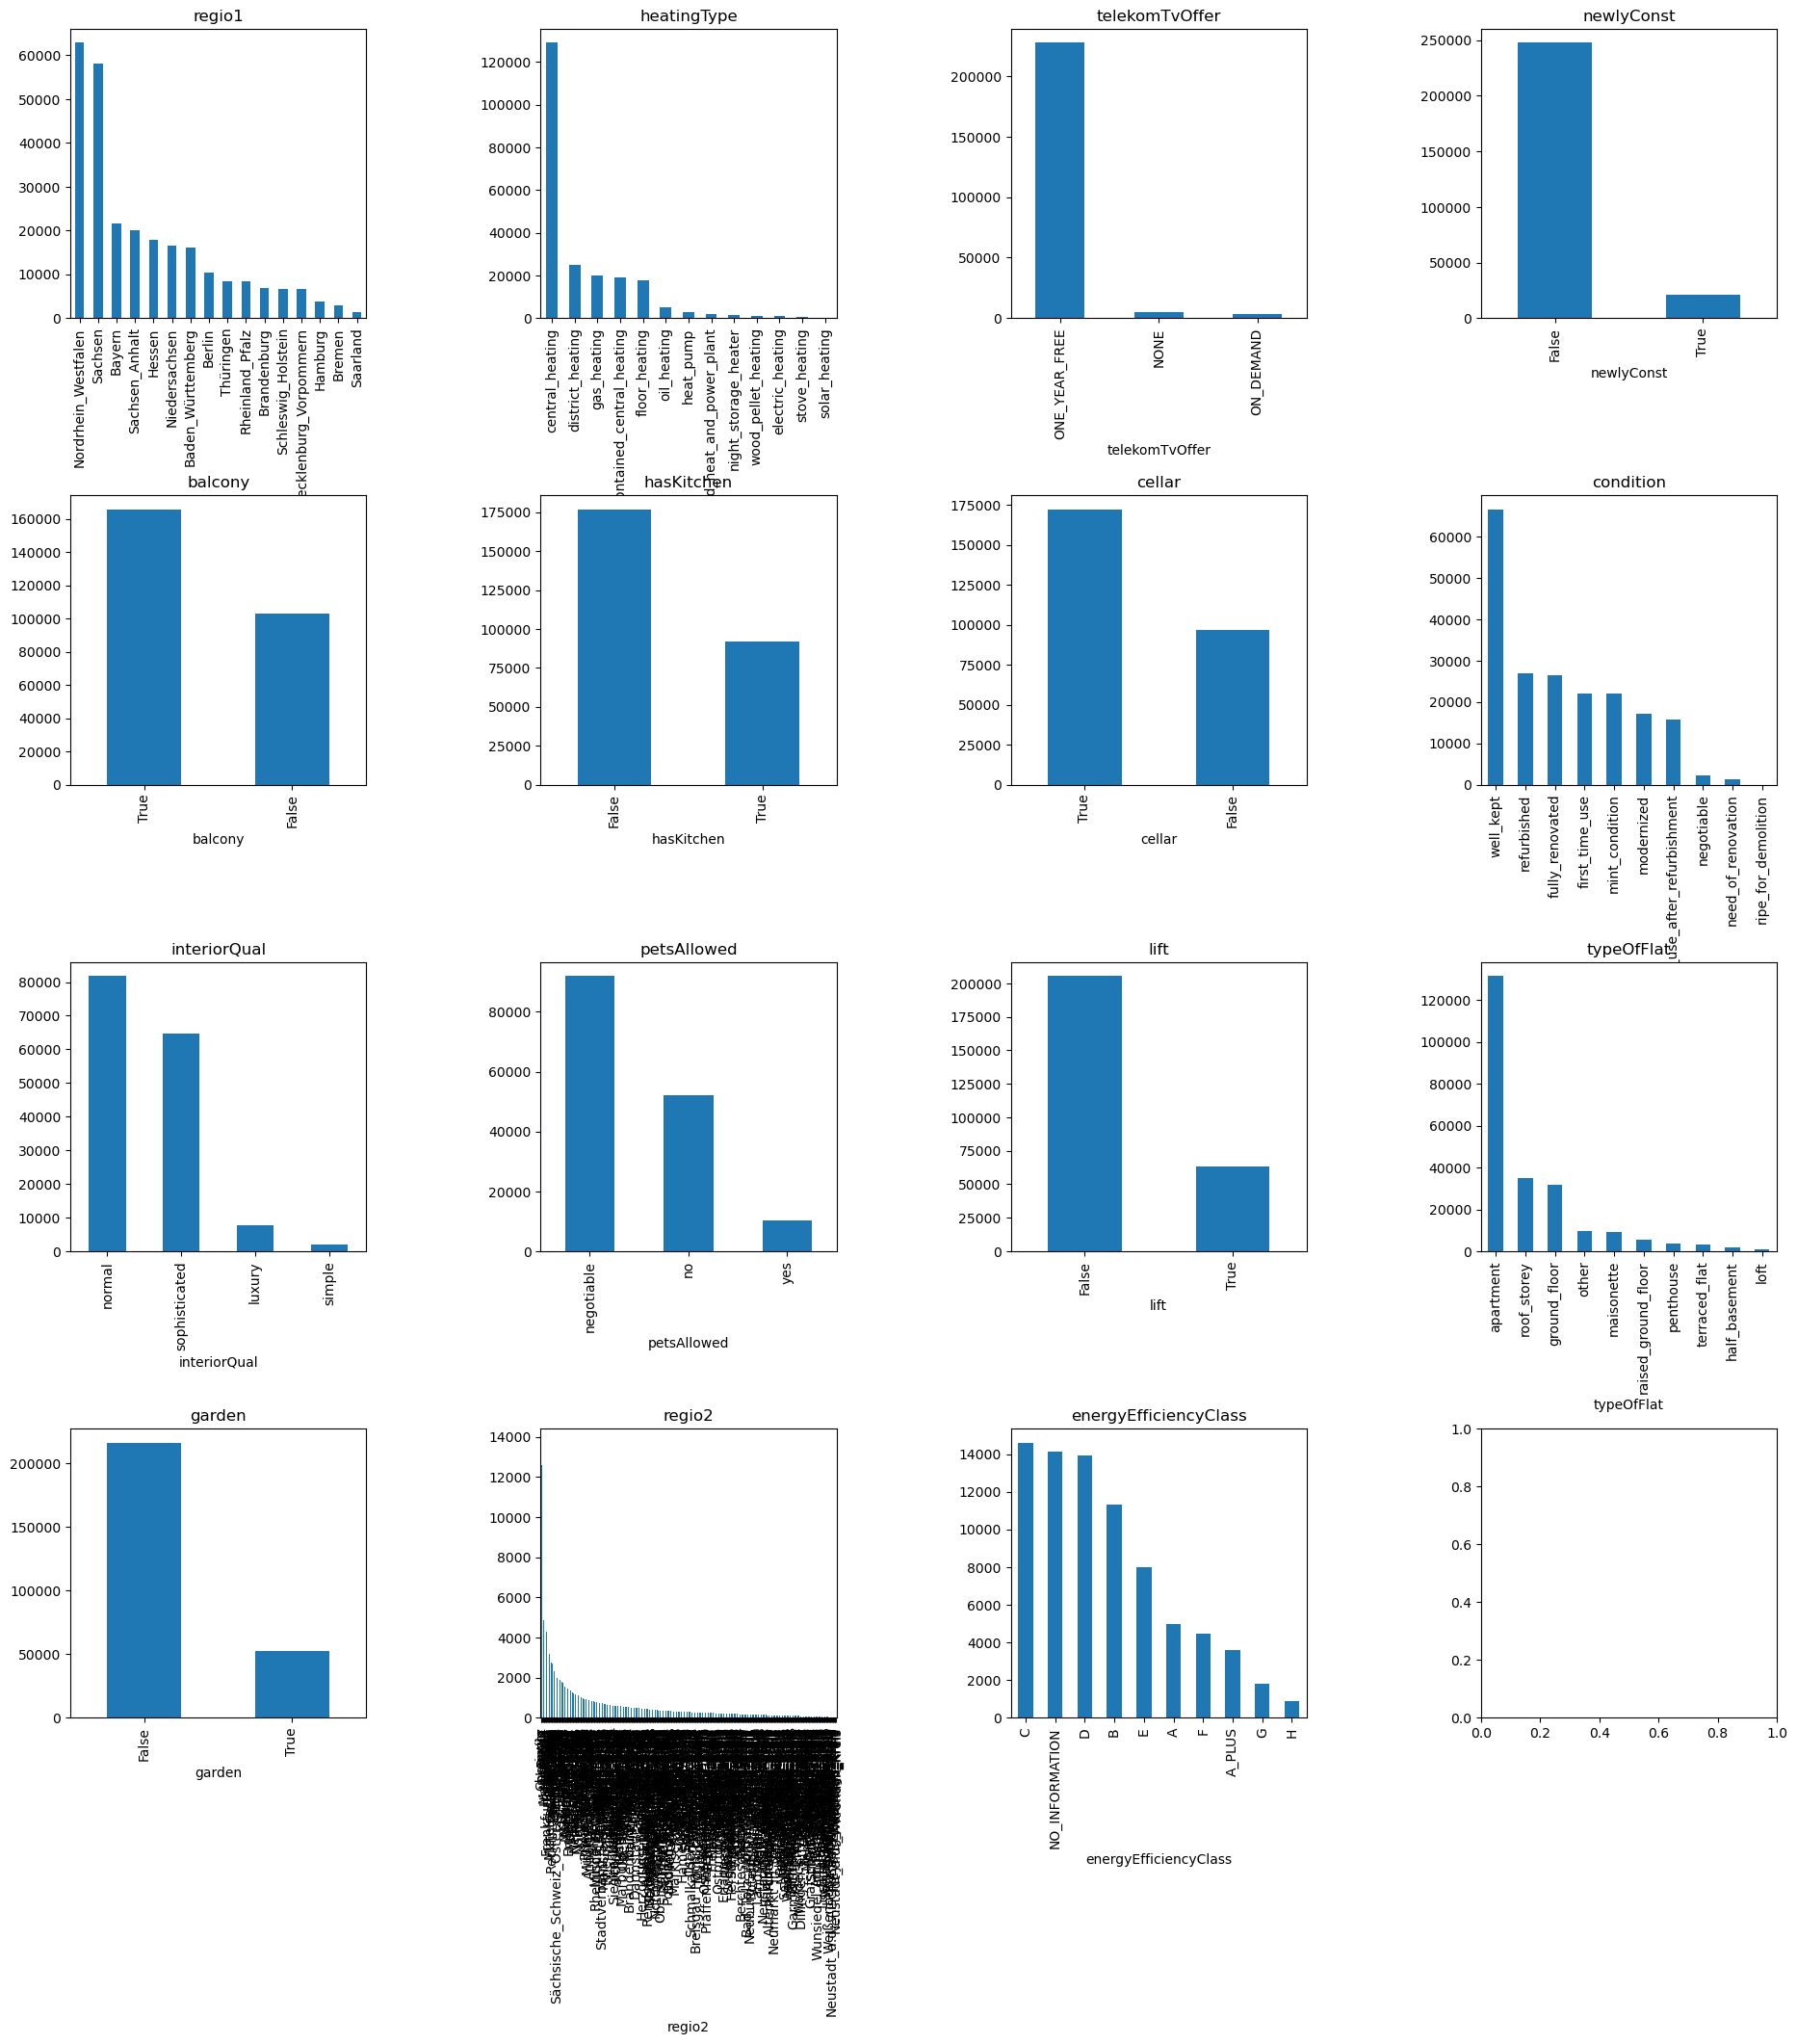

In [92]:
categorical_columns = df.select_dtypes(exclude=np.number).columns

# n times n subplots
n = int(np.ceil(np.sqrt(len(categorical_columns))))
fig, axes = plt.subplots(nrows=n, ncols=n)
fig.tight_layout()

for i, col in enumerate(categorical_columns):
    plt.subplot(n, n, i+1)
    df[col].value_counts().plot(kind='bar', figsize=(20,20), title=col)

At first glance, there are no major conspicuous features, except that an above-average number of flats are on offer in NRW and especially Saxony.

### Numerical data

Next, let's take a closer look at the numerical attributes.

In [93]:
display(df.describe(include=np.number))

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,93052.000000,211805.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.327634,3.714544,6.941294e+02,74.355548,3.765256,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,8.361403,2.738134,1.953602e+04,254.759208,2.214357,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,0.000000,1.000000,0.000000e+00,0.000000,1.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.000000,1.000000,3.380000e+02,54.000000,2.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.000000,3.000000,4.900000e+02,67.320000,3.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.000000,5.000000,7.990000e+02,87.000000,5.000000,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,2241.000000,9.000000,9.999999e+06,111111.000000,9.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


We see that there are some extreme outliers in the data. For example, there is a flat with monthly service charges of 146118 EUR, a property that costs about 15 mio EUR rent per month and has 111111m² living space. We save the names of the suspicious columns in a list. Furthermore, we see that the feature telekomHybridUploadSpeed always has the value 10 or is empty, so we delete it.

In [94]:
interesting_columns = ["serviceCharge", "totalRent", "yearConstructed", "noParkSpaces", "baseRent", "livingSpace", "noRooms", "numberOfFloors", "heatingCosts", "lastRefurbish"]
df.drop(["telekomHybridUploadSpeed"], axis=1, inplace=True, errors="ignore")

### Investigation of outliers¶

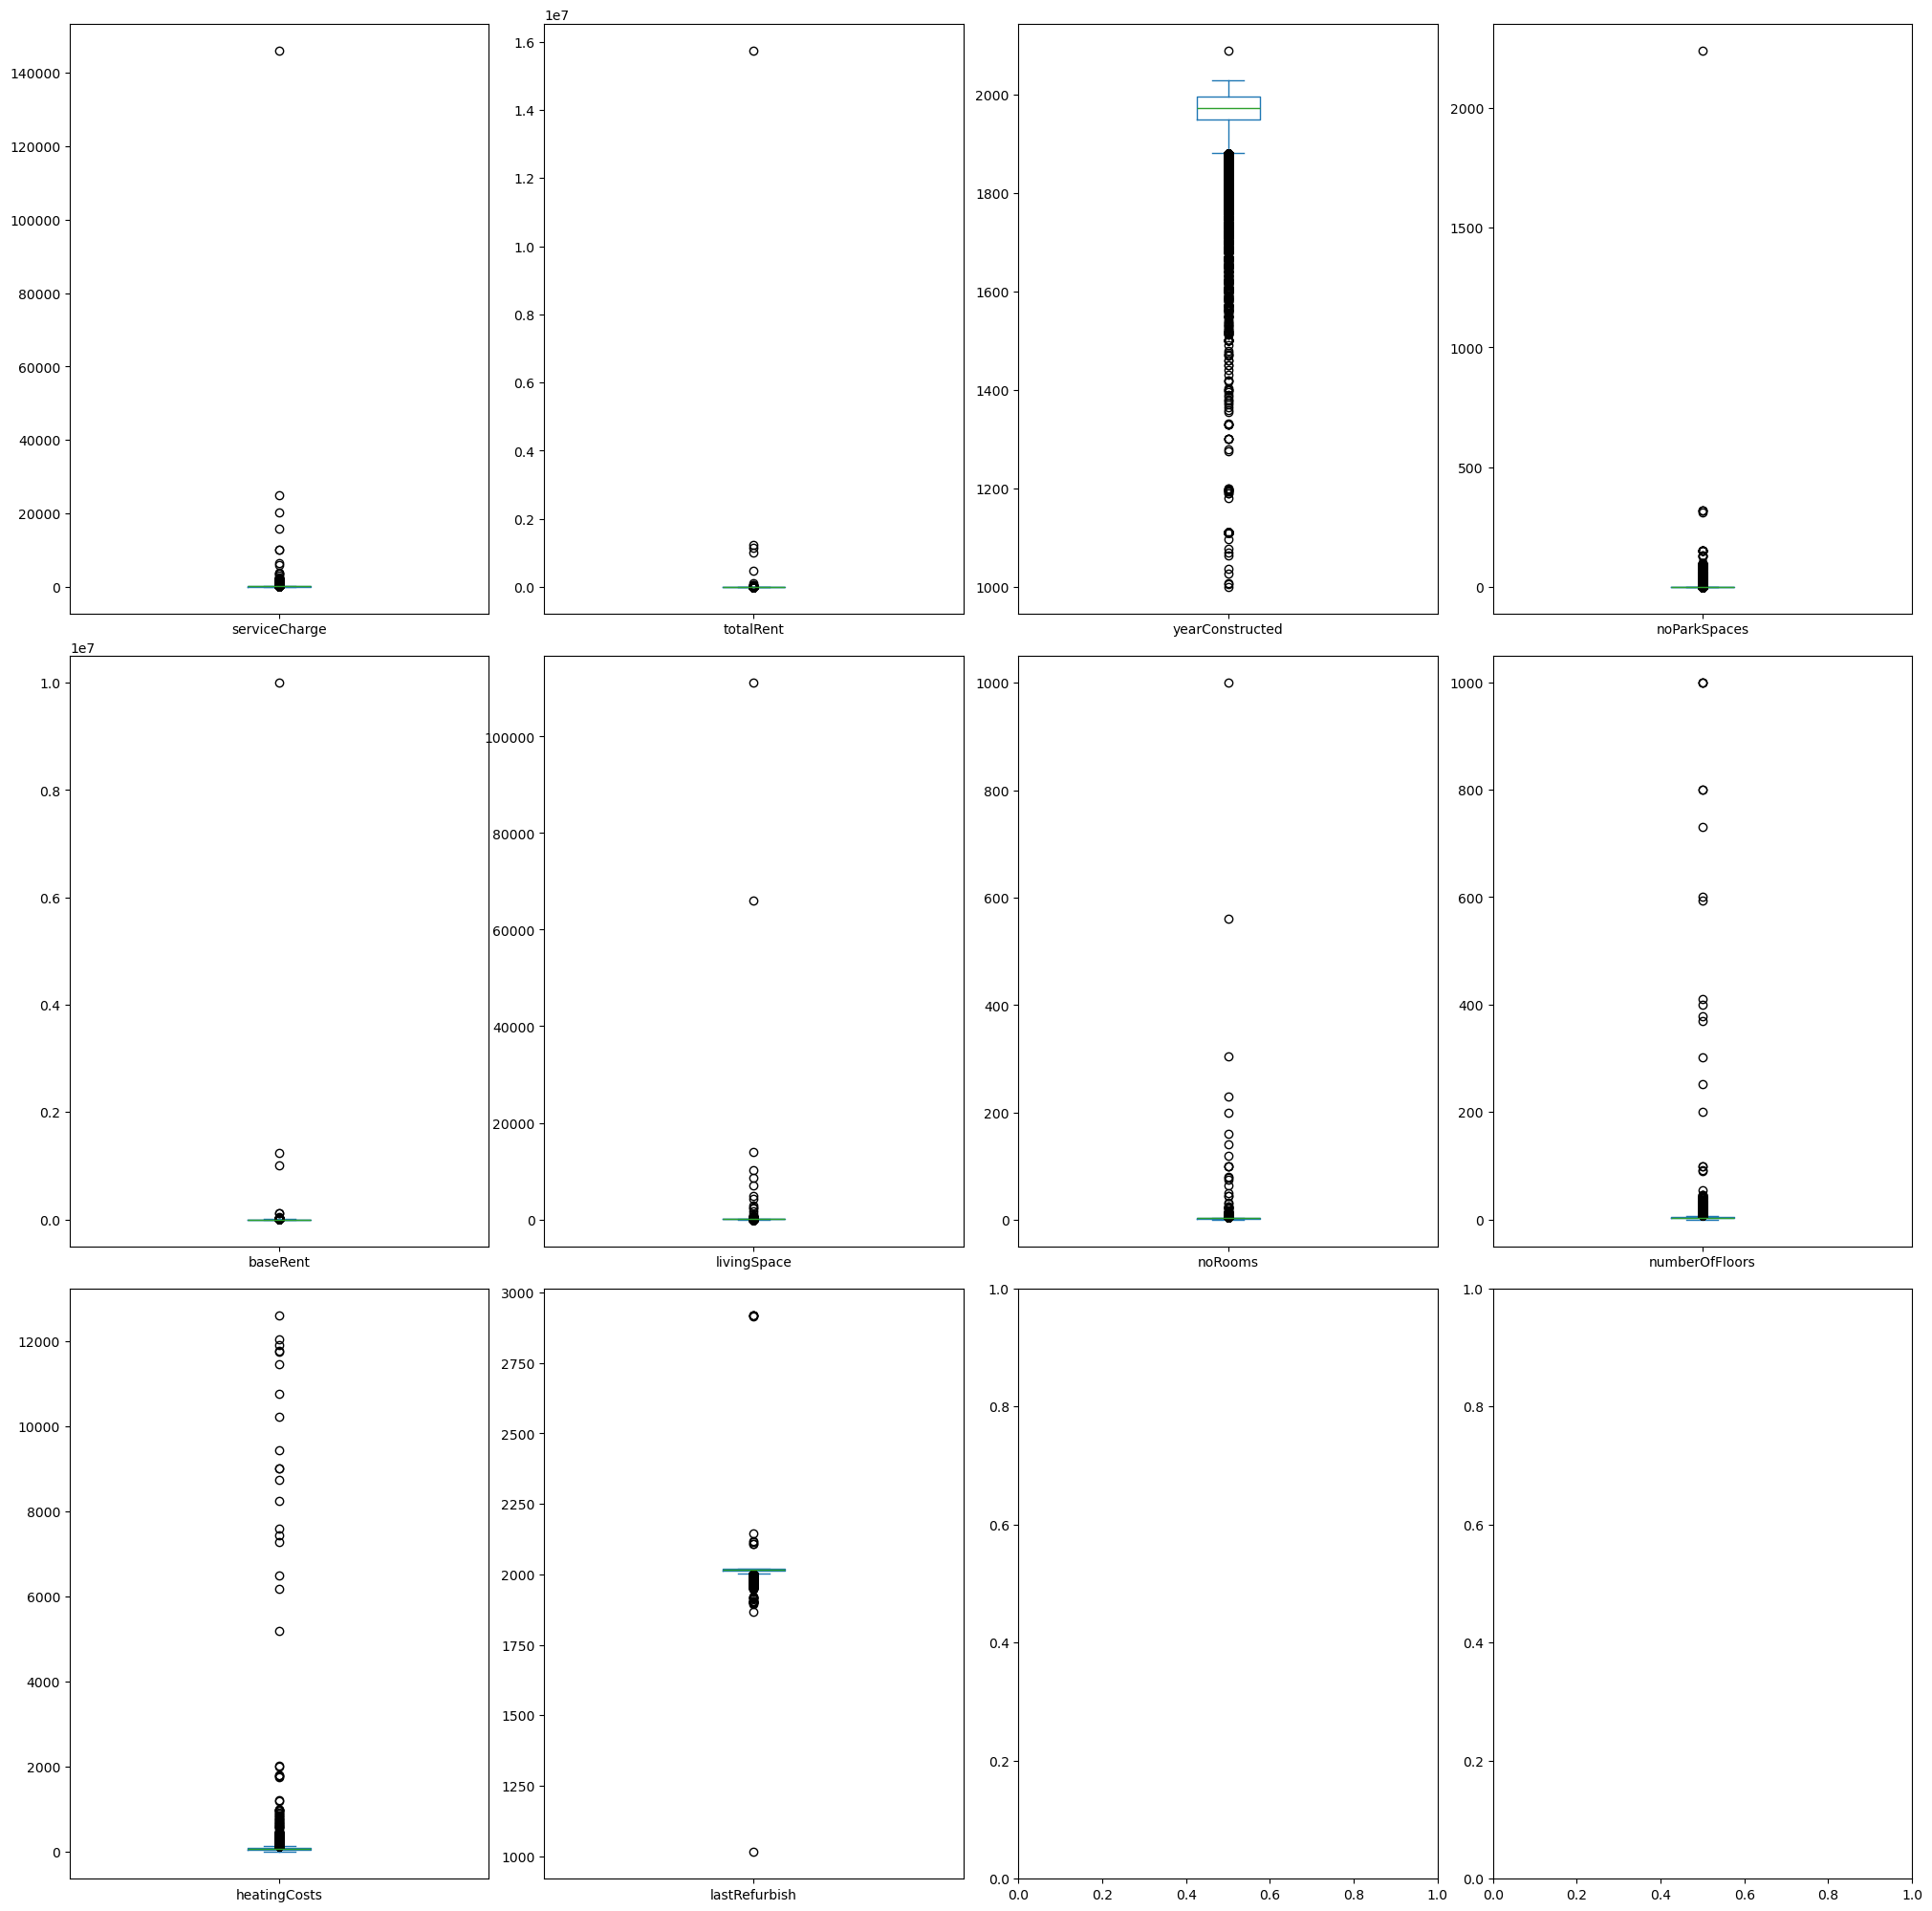

In [95]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,20))
fig.tight_layout()

for i, col in enumerate(interesting_columns):
    plt.subplot(3, 4, i+1)
    df[col].plot(kind="box")

## Data cleaning
There are too many outliers to deal with them all separately. We look at what would happen if we simply threw away the bottom and top 0.5% of the data relating to these attributes.

In [96]:
df[interesting_columns]

,serviceCharge,totalRent,yearConstructed,noParkSpaces,baseRent,livingSpace,noRooms,numberOfFloors,heatingCosts,lastRefurbish
0,245.00,840.0,1965.0,1.0,595.0,86.00,4.0,3.0,NaN,NaN
1,134.00,NaN,1871.0,2.0,800.0,89.00,3.0,NaN,NaN,2019.0
2,255.00,1300.0,2019.0,1.0,965.0,83.80,3.0,4.0,NaN,NaN
3,58.15,NaN,1964.0,NaN,343.0,58.15,3.0,NaN,87.23,NaN
4,138.00,903.0,1950.0,NaN,765.0,84.97,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
268845,90.00,910.0,2016.0,1.0,820.0,90.00,3.0,NaN,NaN,NaN
268846,220.00,1150.0,1983.0,1.0,930.0,115.00,3.5,1.0,NaN,2015.0
268847,220.00,930.0,1965.0,1.0,650.0,95.00,4.0,2.0,NaN,2019.0
268848,175.00,1015.0,2019.0,1.0,840.0,70.00,2.0,5.0,40.00,2019.0


In [97]:
df[interesting_columns].quantile(0.995)

serviceCharge       500.000
totalRent          3473.482
yearConstructed    2020.000
noParkSpaces         16.000
baseRent           3000.000
livingSpace         208.000
noRooms               6.000
numberOfFloors       14.000
heatingCosts        233.000
lastRefurbish      2020.000
Name: 0.995, dtype: float64

In [98]:
display(df[interesting_columns].quantile(0.995))
display(df[interesting_columns].quantile(0.005))

serviceCharge       500.000
totalRent          3473.482
yearConstructed    2020.000
noParkSpaces         16.000
baseRent           3000.000
livingSpace         208.000
noRooms               6.000
numberOfFloors       14.000
heatingCosts        233.000
lastRefurbish      2020.000
Name: 0.995, dtype: float64

serviceCharge         0.00
totalRent           220.00
yearConstructed    1810.02
noParkSpaces          0.00
baseRent            152.00
livingSpace          18.00
noRooms               1.00
numberOfFloors        0.00
heatingCosts          0.00
lastRefurbish      1990.00
Name: 0.005, dtype: float64

This looks like a healthier distribution. We want to continue working with this data. To do this, we create a copy of df. Otherwise, if we accidentally ran the cell several times, df would get smaller and smaller (the quantiles would be recalculated on the new, smaller df)

In [99]:
upper_limits = df[interesting_columns].quantile(0.995)
lower_limits = df[interesting_columns].quantile(0.005)

df_reduced = df.copy()

# For each column we keep: Data that are < (99.5% quantile) and > (0.5% quantile) OR that are NaN (we will deal with this later). 
for col in interesting_columns:
    df_reduced = df_reduced[((df_reduced[col] <= upper_limits[col]) & (df_reduced[col] >= lower_limits[col])) | df_reduced[col].isna()]

display(df_reduced.describe(include=np.number))

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,253712.000000,260087.000000,258303.000000,227912.000000,220887.000000,204896.000000,89521.000000,204896.000000,260087.000000,260087.000000,260087.000000,260087.000000,157840.000000,210731.000000,165349.000000,260087.000000,260087.000000,82992.000000,77548.000000,45313.000000,45313.000000
mean,147.046811,9.739910,3.369691,28.864072,790.174609,1967.950936,1.096681,3.716520,624.494751,72.497264,3.729579,2.614712,114.675604,2.094547,3.448687,2.565418,3.047396,73.682626,2013.987672,89.106970,0.199785
std,74.688809,6.327816,1.948445,16.321226,457.055444,38.328240,0.691938,2.733841,409.381922,28.112516,2.163431,0.927047,61.261730,3.634391,1.647175,0.911004,1.349376,32.444527,7.045726,5.405664,0.009678
min,0.000000,0.000000,-12.330000,1.000000,220.000000,1811.000000,0.000000,1.000000,152.000000,18.000000,1.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1990.000000,71.430000,0.170500
25%,95.000000,6.000000,1.980000,10.000000,470.000000,1950.000000,1.000000,1.000000,339.000000,54.475000,2.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2013.000000,90.760000,0.191500
50%,135.000000,9.000000,3.370000,40.000000,648.000000,1972.000000,1.000000,3.000000,490.000000,67.170000,3.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,185.000000,13.000000,4.550000,40.000000,973.000000,1996.000000,1.000000,5.000000,790.000000,86.000000,5.000000,3.000000,140.200000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,500.000000,121.000000,14.920000,100.000000,3470.000000,2020.000000,16.000000,9.000000,3000.000000,208.000000,9.000000,6.000000,1996.000000,999.000000,14.000000,5.000000,7.000000,233.000000,2020.000000,90.760000,0.227600


So we have now made a rough selection of attributes that we would like to work with from now on.

### Handling missing records
We have just seen that there are some NaN (=not a number) fields in the data. Before we decide what to do with them, we get an overview of how many there are.

In [100]:
# isna() converts each value into a boolean data type (0/1). 
# sum() sums these values per column. 
# So you get the number of NaN values per column.
display(df_reduced.isna().sum())

regio1                        0
serviceCharge              6375
heatingType               43271
telekomTvOffer            31473
newlyConst                    0
balcony                       0
picturecount                  0
pricetrend                 1784
telekomUploadSpeed        32175
totalRent                 39200
yearConstructed           55191
noParkSpaces             170566
hasKitchen                    0
cellar                        0
yearConstructedRange      55191
baseRent                      0
livingSpace                   0
condition                 66312
interiorQual             109212
petsAllowed              110565
lift                          0
baseRentRange                 0
typeOfFlat                35148
noRooms                       0
thermalChar              102247
floor                     49356
numberOfFloors            94738
noRoomsRange                  0
garden                        0
livingSpaceRange              0
regio2                        0
heatingC

Some of them have a lot of NaN values. If we were to ignore all the data, there would not be many left. Therefore, we first follow this strategy:
- For numeric values, the mean value of the remaining values is used for a missing value.
- For non-numeric values, the most frequent value (=mode) of the remaining values is used for a missing value.

To fill in the values, scikit-learn provides the class SimpleImputer.
https://scikit-learn.org/1.5/modules/generated/sklearn.impute.SimpleImputer.html

In [101]:
from sklearn.impute import SimpleImputer

# We still have to convert the boolean values explicitly, otherwise the imputer throws an error.
df_reduced = df_reduced.replace({False: 0, True: 1})

numeric_columns = df_reduced.select_dtypes(include=np.number).columns
numeric_columns = numeric_columns.drop("baseRent") # We do not want to fill in missing lables, so we drop it now. 
categorical_columns = df_reduced.select_dtypes(exclude=np.number).columns

imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

#df_reduced.loc[:,numeric_columns] = imp_mean.fit_transform(df_reduced[numeric_columns])
df_reduced[numeric_columns] = imp_mean.fit_transform(df_reduced[numeric_columns])
#df_reduced.loc[:,categorical_columns] = imp_freq.fit_transform(df_reduced[categorical_columns])
df_reduced[categorical_columns] = imp_freq.fit_transform(df_reduced[categorical_columns])


## Feature Engineering
### Correlation
We generate scatter plots to identify obvious linear or non-linear relationships between individual features and the target variable.

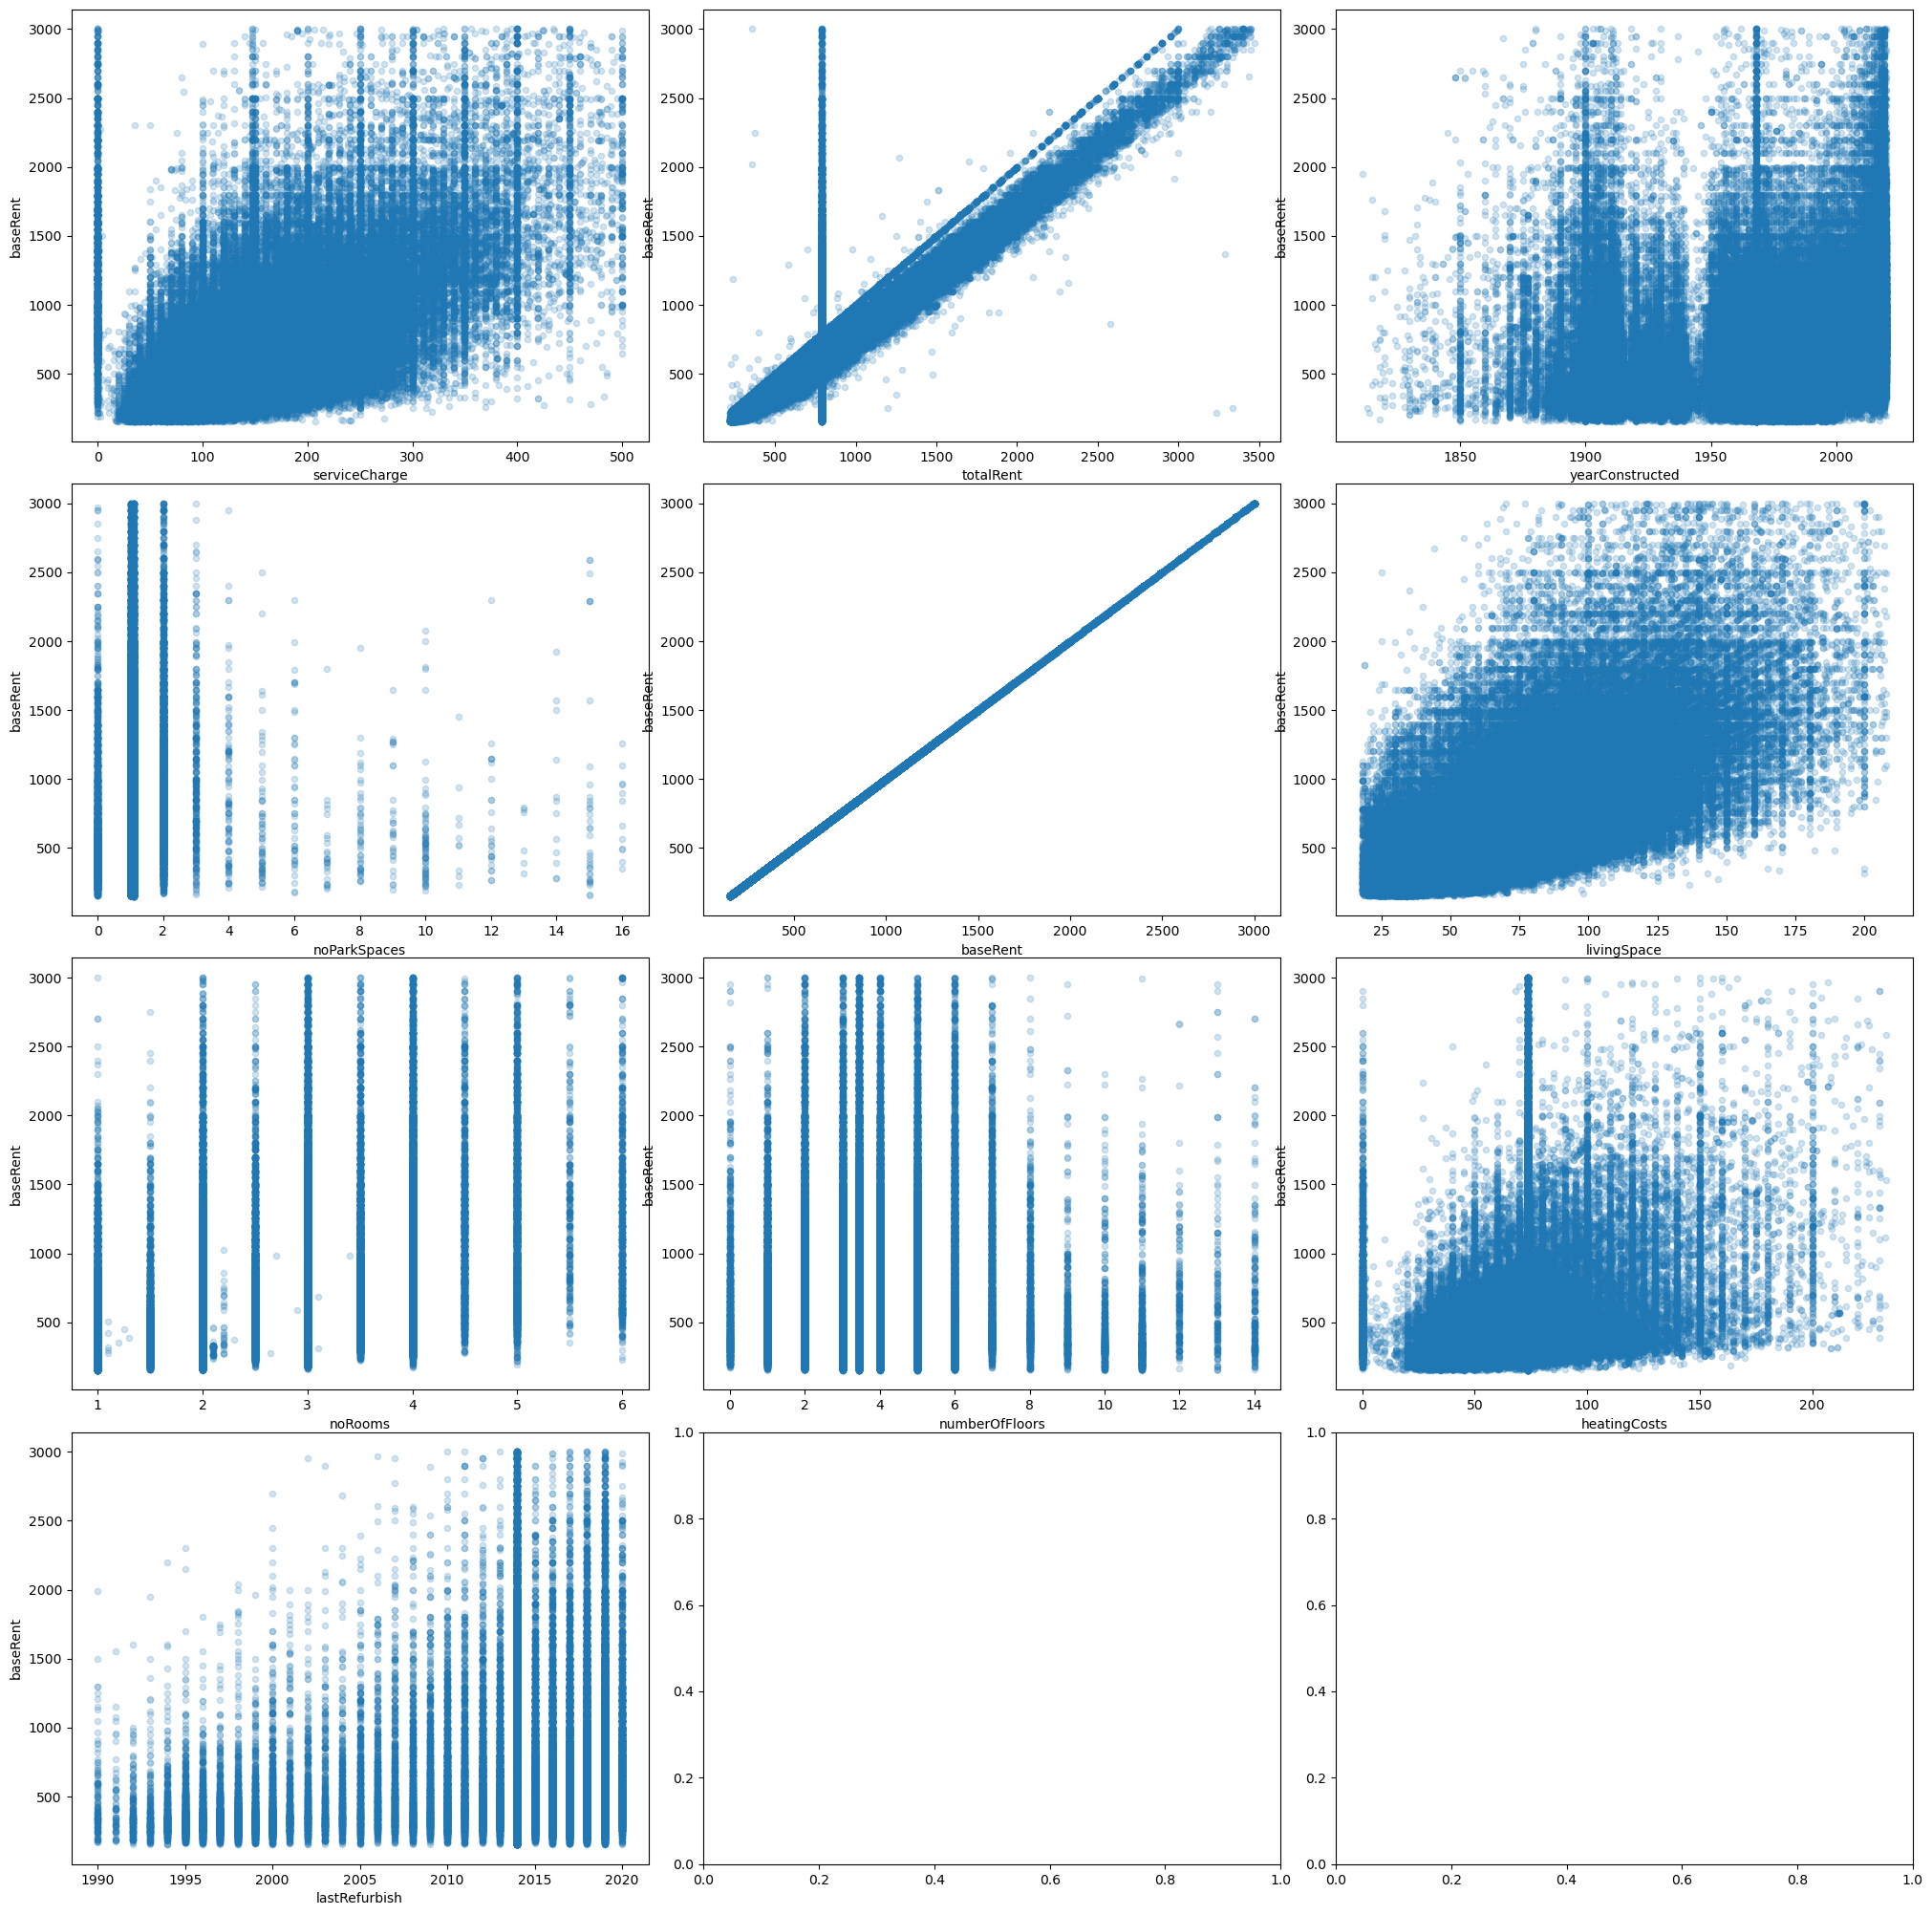

In [102]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
fig.tight_layout()

for i, col in enumerate(interesting_columns):
    #plt.subplot(4, 3, i+1)
    df_reduced[["baseRent",col]].plot.scatter(x=col, y="baseRent", ax=axes[int(np.floor(i/3)),i%3], alpha=0.2)

The data scatter relatively broadly. Expected correlations between size and rent. Initially no further conspicuous features.

### One-Hot Encoding

Next, transform df_reduced categorical columns using One-Hot encoding. For this we use the pandas function get_dummies() which performs the One-Hot encoding in a DataFrame for each categorical column. This means that for each categorical column, several 0/1-valued columns are created, just as many as there are values of the variable. The result is a DataFrame that has many more columns. But these are all numerical, i.e. we can use them for linear regression (or another machine learning algorithm).

In [103]:
df_reduced = pd.get_dummies(df_reduced)

Final check of the data to see if everything has worked:

In [104]:
display(df_reduced)

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,...,regio2_Wilhelmshaven,regio2_Wismar,regio2_Wittenberg_Kreis,regio2_Wittmund_Kreis,regio2_Wolfenbüttel_Kreis,regio2_Wolfsburg,regio2_Worms,regio2_Wunsiedel_im_Fichtelgebirge_Kreis,regio2_Wuppertal,regio2_Würzburg,regio2_Würzburg_Kreis,regio2_Zollernalbkreis,regio2_Zweibrücken,regio2_Zwickau,regio2_Zwickau_Kreis,energyEfficiencyClass_A,energyEfficiencyClass_A_PLUS,energyEfficiencyClass_B,energyEfficiencyClass_C,energyEfficiencyClass_D,energyEfficiencyClass_E,energyEfficiencyClass_F,energyEfficiencyClass_G,energyEfficiencyClass_H,energyEfficiencyClass_NO_INFORMATION
0,245.00,6.0,4.62,10.000000,840.000000,1965.0,1.000000,2.0,595.0,86.00,4.0,4.0,181.400000,1.000000,3.000000,4.0,4.0,73.682626,2013.987672,89.10697,0.199785,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,134.00,8.0,3.47,10.000000,790.174609,1871.0,2.000000,1.0,800.0,89.00,5.0,3.0,114.675604,2.094547,3.448687,3.0,4.0,73.682626,2019.000000,89.10697,0.199785,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,255.00,8.0,2.72,2.400000,1300.000000,2019.0,1.000000,9.0,965.0,83.80,6.0,3.0,114.675604,3.000000,4.000000,3.0,4.0,73.682626,2013.987672,89.10697,0.199785,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,58.15,9.0,1.53,40.000000,790.174609,1964.0,1.096681,2.0,343.0,58.15,2.0,3.0,86.000000,3.000000,3.448687,3.0,2.0,87.230000,2013.987672,89.10697,0.199785,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,138.00,19.0,2.46,28.864072,903.000000,1950.0,1.096681,1.0,765.0,84.97,5.0,3.0,188.900000,1.000000,3.448687,3.0,4.0,73.682626,2013.987672,89.10697,0.199785,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,90.00,0.0,2.74,10.000000,910.000000,2016.0,1.000000,9.0,820.0,90.00,6.0,3.0,114.675604,2.094547,3.448687,3.0,4.0,73.682626,2013.987672,89.10697,0.199785,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
268846,220.00,12.0,6.49,28.864072,1150.000000,1983.0,1.000000,4.0,930.0,115.00,6.0,3.5,114.675604,1.000000,1.000000,3.0,5.0,73.682626,2015.000000,89.10697,0.199785,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
268847,220.00,21.0,2.90,40.000000,930.000000,1965.0,1.000000,2.0,650.0,95.00,5.0,4.0,160.770000,1.000000,2.000000,4.0,4.0,73.682626,2019.000000,89.10697,0.199785,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
268848,175.00,16.0,4.39,28.864072,1015.000000,2019.0,1.000000,9.0,840.0,70.00,6.0,2.0,24.700000,2.094547,5.000000,2.0,3.0,40.000000,2019.000000,89.10697,0.199785,False,False,F

### Removing the label from the attributes

IMPORTANT: We want to *predict* the cold rent or total rent. We must therefore also exclude this (and the baseRentRange attribute derived directly from it). 

First, we remove records for which we do not have a label.

In [105]:
df_reduced = df_reduced[df_reduced["baseRent"].isna() == False] # Removing the records without a label
y = df_reduced["baseRent"]
df_reduced = df_reduced.drop(["baseRent", "totalRent","baseRentRange"], axis=1, errors="ignore") 

### Creating training and test set

Before we process the data further, we split it into training and test set.

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_reduced, y, test_size=0.2, random_state=1)

### Model training

Now the time has come: we are training the regression model!

In [107]:
from sklearn import linear_model
m = linear_model.LinearRegression(fit_intercept=False)
m.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [108]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
r2_train = m.score(X_train, y_train)
rmse_train = root_mean_squared_error(y_train, m.predict(X_train))
mae_train = mean_absolute_error(y_train, m.predict(X_train))
r2_test = m.score(X_test, y_test)
rmse_test = root_mean_squared_error(y_test, m.predict(X_test))
mae_test = mean_absolute_error(y_test, m.predict(X_test))

In [109]:
print(f"R² Training data: {r2_train}")
print(f"Mean squared error Training data: {rmse_train}")
print(f"Mean absolute error Training data: {mae_train}")
print(f"R² Test data: {r2_test}")
print(f"Mean squared error Test data: {rmse_test}")
print(f"Mean absolute error Test data: {mae_test}")

R² Training data: 0.8399814836184682
Mean squared error Training data: 163.87690907073176
Mean absolute error Training data: 106.60367361684128
R² Test data: 0.8400247836465099
Mean squared error Test data: 163.27711800801916
Mean absolute error Test data: 106.33262191302425


The result of the multiple linear regression is not so easy to visualise. Here is an experiment as a scatterplot between the size of the flat and the cold rent (blue) or the predicted cold rent (red).

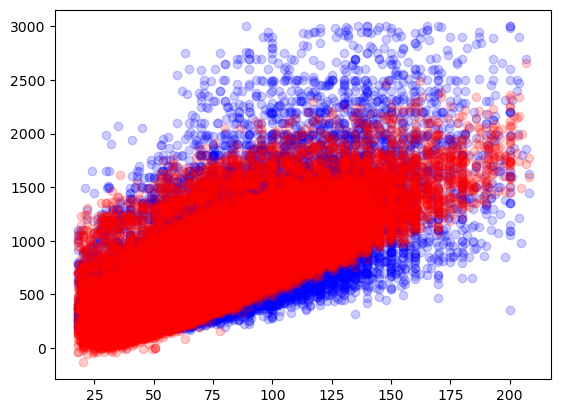

In [110]:
plt.plot(X_test["livingSpace"], y_test, "bo", alpha=0.2)
plt.plot(X_test["livingSpace"], m.predict(X_test), "ro", alpha=0.2)

In [111]:
print(list(zip(m.coef_, df_reduced.head())))

w=m.coef_
w.sort()
w

[(0.16416203493090525, 'serviceCharge'), (2.6918843462412774, 'picturecount'), (14.539475698698526, 'pricetrend'), (0.11622688028530526, 'telekomUploadSpeed'), (-1.043531243689955, 'yearConstructed'), (4.430709634560515, 'noParkSpaces'), (19.9641525909622, 'yearConstructedRange'), (8.447571968046596, 'livingSpace'), (-25.1220736438204, 'noRooms'), (-0.056416868641122164, 'thermalChar'), (-0.19605746535819257, 'floor'), (0.5829439622273327, 'numberOfFloors'), (14.056056764078313, 'noRoomsRange'), (-7.54707745923205, 'livingSpaceRange'), (-0.4180089533279485, 'heatingCosts'), (1.3823065196839366, 'lastRefurbish'), (0.6008187831976315, 'electricityBasePrice'), (166.38768241845, 'electricityKwhPrice'), (96.82718812769953, 'regio1_Baden_Württemberg'), (31.22936659722727, 'regio1_Bayern'), (136.72521049440854, 'regio1_Berlin'), (-52.39865990195885, 'regio1_Brandenburg'), (-17.408913158744138, 'regio1_Bremen'), (173.6235806700345, 'regio1_Hamburg'), (44.524762830644406, 'regio1_Hessen'), (-57

array([-2.34369255e+02, -2.19086715e+02, -2.18532836e+02, -2.17738486e+02,
       -2.16135900e+02, -2.16108949e+02, -2.10436606e+02, -2.06844435e+02,
       -2.03442491e+02, -2.02758247e+02, -1.98825760e+02, -1.96918683e+02,
       -1.95422069e+02, -1.87499372e+02, -1.87065680e+02, -1.85861653e+02,
       -1.83695253e+02, -1.80476123e+02, -1.74815767e+02, -1.71619163e+02,
       -1.68471465e+02, -1.62266046e+02, -1.61623218e+02, -1.60869120e+02,
       -1.60100609e+02, -1.59546510e+02, -1.51120473e+02, -1.50551627e+02,
       -1.48987586e+02, -1.48684553e+02, -1.47331405e+02, -1.43061699e+02,
       -1.42783894e+02, -1.42339722e+02, -1.41964245e+02, -1.41211426e+02,
       -1.39102349e+02, -1.36934260e+02, -1.36495781e+02, -1.35949967e+02,
       -1.35856248e+02, -1.34961330e+02, -1.32169081e+02, -1.31912789e+02,
       -1.31422532e+02, -1.30543891e+02, -1.26837260e+02, -1.25486726e+02,
       -1.24070796e+02, -1.22374682e+02, -1.22222976e+02, -1.20161133e+02,
       -1.18488576e+02, -

# Tasks

### 1) Work through the notebook and try to follow the individual steps.

### 2) How does the predictive quality of the model change if you do not remove the outliers?
To do this, go to the data cleaning section, identify the code responsible for removing the outliers and comment it out.

### 3) Create a model for a specific geographic region only.
Create a model that predicts the cold rent only for a specific region (e.g. Baden Württemberg, Karlsruhe, Karlsruhe and neighbouring districts). 
The easiest way to do this is to restrict the data set directly after reading in the data and then run all further cells unchanged. How is the prediction quality on training and test data?

### 4) Build a model with other features.
Here are some suggestions:
- Include features in the model that we excluded at the beginning and see if they improve the prediction quality.
- Take fewer features. The prediction quality (at least on the training data set) will be worse, but on small data sets you should get a more robust model, i.e. one that performs as well on the test data as on the training data. Either select suitable features by hand or use an automatic method such as SelectKBest. Use the following code to do this:

In [112]:
from sklearn.feature_selection import SelectKBest, f_regression
feature_selection = SelectKBest(f_regression, k=50) # A transformer that selects the 50 most promising features via f_regression

X_train = feature_selection.fit_transform(X_train, y_train)
X_test = feature_selection.transform(X_test)

- Create new features by combining or transforming existing features, e.g. polynomial or interaction features. Here is a code example with which you can create interaction features Bundesland x livingSpace. This means that the coefficient for the feature livingSpace can be different from state to state. The coefficient for livingSpace is the price that has to be paid for an additional square metre of housing.

In [113]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2,interaction_only=True) # A transformer that generates interaction features of (up to) degree 2

# Interaction features: Bundesland x livingSpace
bundeslaender_columns = "regio1_" + df["regio1"].unique()

for col in bundeslaender_columns:
    features = pf.fit_transform(df_reduced[[col,"livingSpace"]])
    df_reduced[col + "_livingSpace"] = features[:,-1]

### 5) Bonus
- Predict the cold rent for your flat. To do this, think about what the feature vector for your flat would look like, create a DataFrame with one row and apply the model you have learned with .predict().